In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read excel file
df1 = pd.read_excel("/content/UPS_OEM_PYTHON2(Clust).xlsx")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Part Desc                  209 non-null    object 
 1   Monthly Part Freq Numeric  209 non-null    int64  
 2   Customer                   209 non-null    object 
 3   Customer rank Numeric      209 non-null    int64  
 4   OK                         209 non-null    int64  
 5   Rej                        209 non-null    int64  
 6   Rework                     209 non-null    int64  
 7   Sales Price/Pc             209 non-null    float64
 8   RM Cheese Wt               209 non-null    float64
 9   Crack                      209 non-null    int64  
 10  Plating Issues             209 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 18.1+ KB


In [4]:
df1.describe()

,Monthly Part Freq Numeric,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues
count,209.000000,209.000000,2.090000e+02,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,12.167464,2.741627,1.043558e+05,2120.325359,5349.306220,20.344630,62.152201,1009.019139,2659.224880
std,21.528507,4.002432,2.037635e+05,4698.270731,22470.982293,57.668467,140.012726,2830.049492,7048.715009
min,1.000000,0.000000,5.410000e+02,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
25%,2.000000,0.000000,9.023000e+03,47.000000,101.000000,2.020000,10.270000,0.000000,0.000000
50%,5.000000,2.000000,3.305900e+04,315.000000,684.000000,5.029200,23.000000,50.000000,195.000000
75%,11.000000,2.000000,1.008280e+05,1826.000000,3053.000000,13.170000,52.000000,579.000000,1655.000000
max,152.000000,13.000000,1.737118e+06,33890.000000,304874.000000,530.040000,1110.000000,19413.000000,40194.000000


In [5]:
dups = df1.duplicated()
print("Duplicated numbers is %d" % (dups.sum()))
df1[dups]

Duplicated numbers is 0


,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues


In [6]:
df1.isnull().sum()

Part Desc                    0
Monthly Part Freq Numeric    0
Customer                     0
Customer rank Numeric        0
OK                           0
Rej                          0
Rework                       0
Sales Price/Pc               0
RM Cheese Wt                 0
Crack                        0
Plating Issues               0
dtype: int64

# OK Outlier Detection

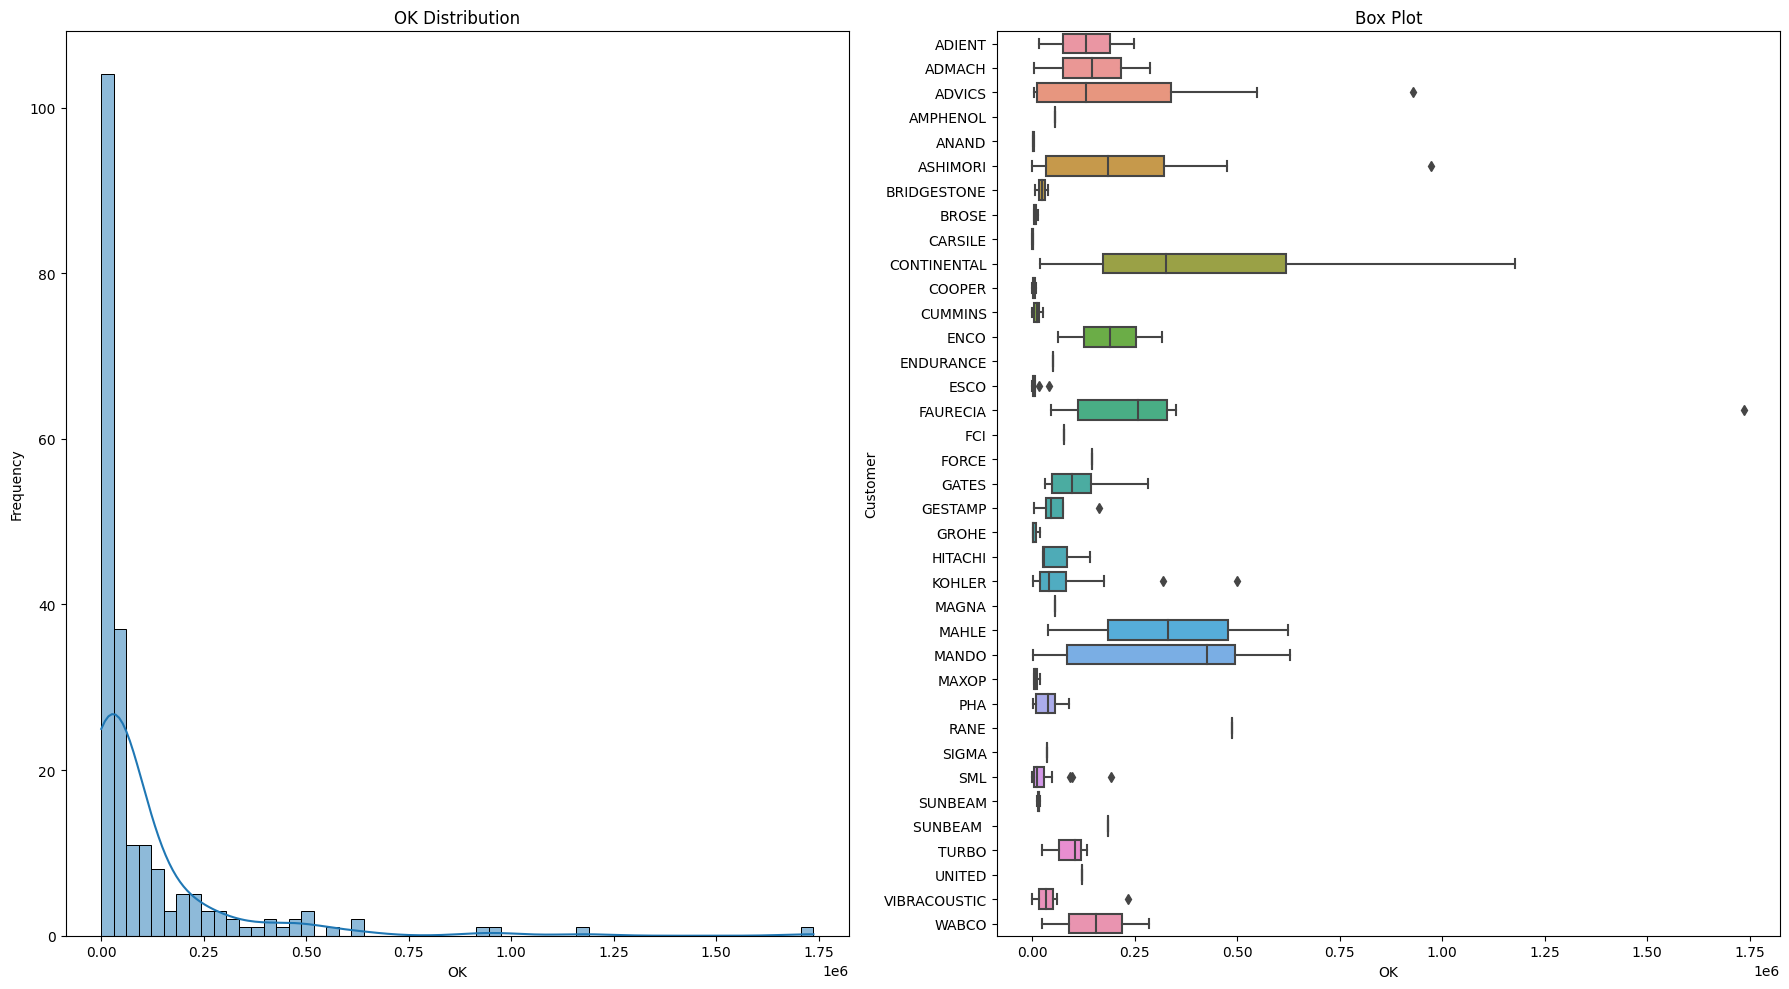

In [7]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the histogram on the first subplot
sns.histplot(data=df1, x='OK', kde=True, ax=axes[0])
axes[0].set_xlabel('OK')
axes[0].set_title('OK Distribution')
axes[0].set_ylabel('Frequency')

# Create a boxplot with swapped x and y axes on the second subplot
sns.boxplot(x='OK', y='Customer', data=df1, ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('OK')
axes[1].set_ylabel('Customer')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()



# Is it noise in data or not ??

In [8]:
d1 = df1['Customer']=='VIBRACOUSTIC'
d11 = df1[d1]

d2 = d11.OK > 100000
d22 = d11[d2]

d22

,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues
200,DIA 5.5x9.3 SPL PIN COLLAR Zn Ni*,17,VIBRACOUSTIC,2,235217,3741,7238,4.0,4.39,0,6974


In [9]:
d1 = df1['Customer']=='SML'
d11 = df1[d1]

d2 = d11.OK > 60000
d22 = d11[d2]

d22

,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues
162,M12x1.50x30 HEX FLANGE GR8.8 ZTVYP*,27,SML,0,192976,16874,3053,7.52,44.5,15259,2681
166,M10x1.25x30 HEX FLANGE GR 6 ZTVYP*,8,SML,0,96977,519,744,5.06,26.3,494,657
186,M10x1.25x25 HEX FLANGE GR 6 ZTVYP*,6,SML,0,93426,495,412,4.56,23.7,256,355


# Sales Price/Pc Outliers detection

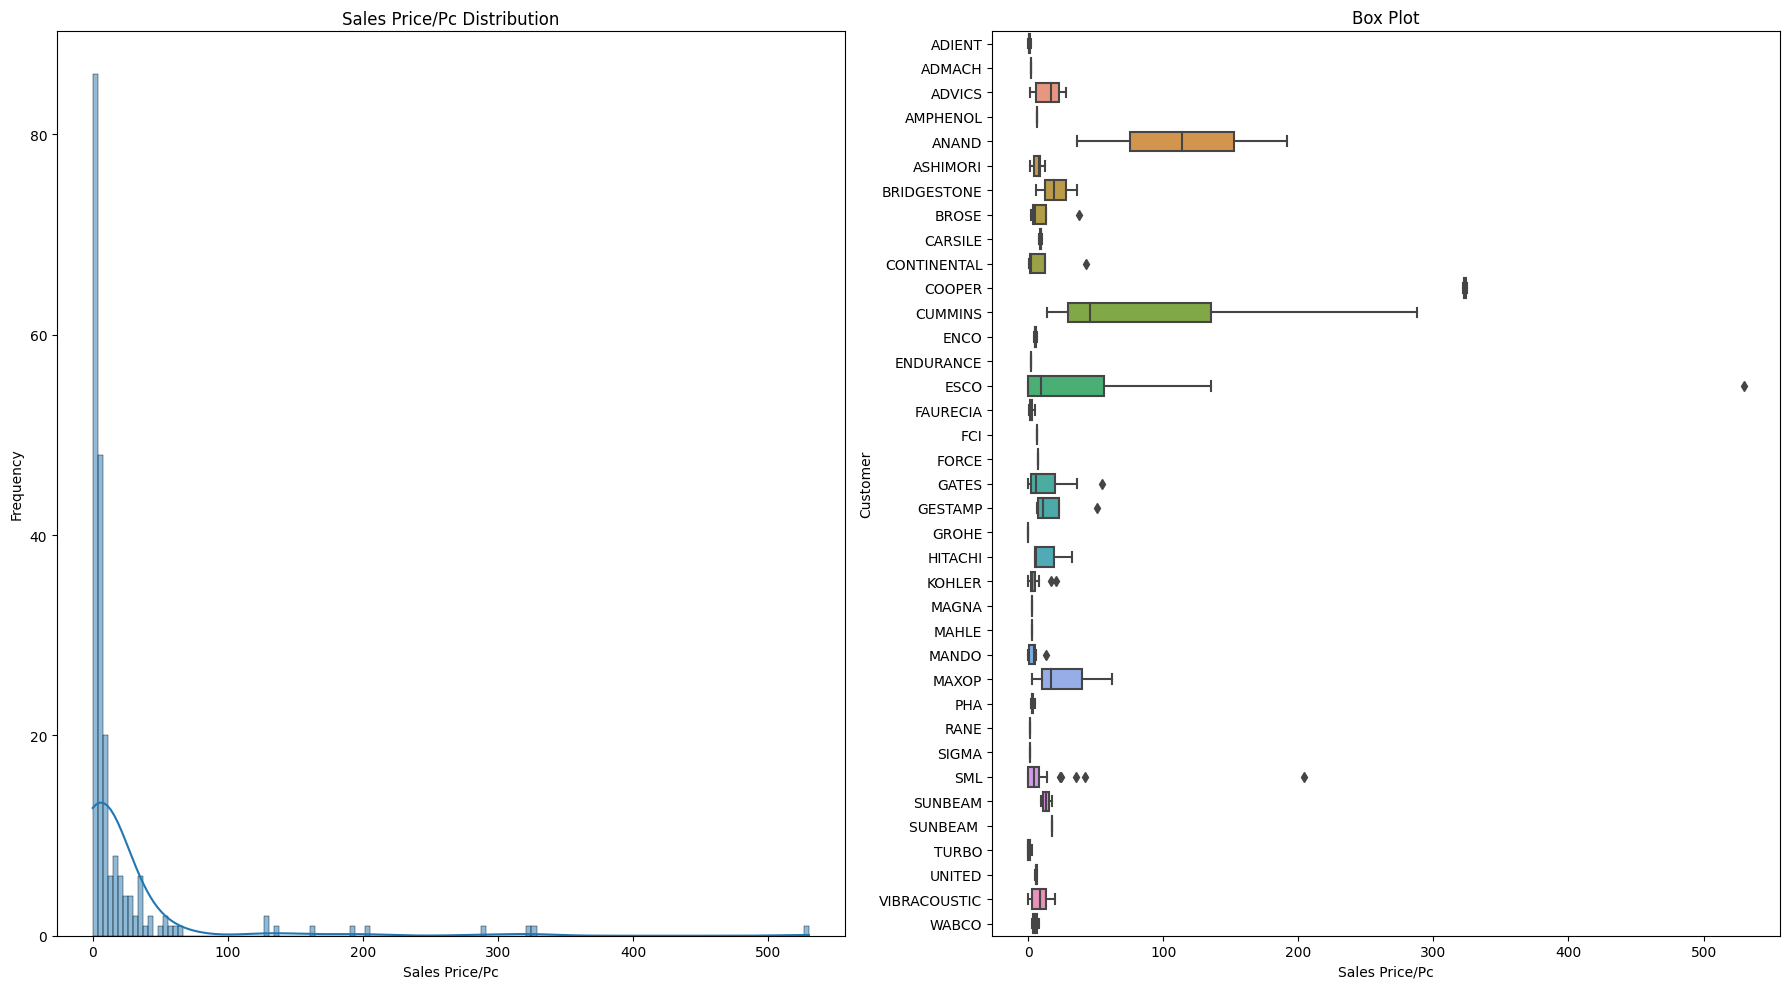

In [10]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the histogram on the first subplot
sns.histplot(data=df1, x='Sales Price/Pc', kde=True, ax=axes[0])
axes[0].set_xlabel('Sales Price/Pc')
axes[0].set_title('Sales Price/Pc Distribution')
axes[0].set_ylabel('Frequency')

# Create a boxplot with swapped x and y axes on the second subplot
sns.boxplot(x='Sales Price/Pc', y='Customer', data=df1, ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('Sales Price/Pc')
axes[1].set_ylabel('Customer')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Checking noise in data

In [11]:
d1 = df1['Customer'] == 'CUMMINS'
d11 = df1[d1]

d22 = d11[d11['Sales Price/Pc'] < 20]


d22

,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues
47,M 10 x 75 HFS,5,CUMMINS,12,16351,22,123,14.0,56.85,20,9


# RM Cheese Wt Outliers Detection

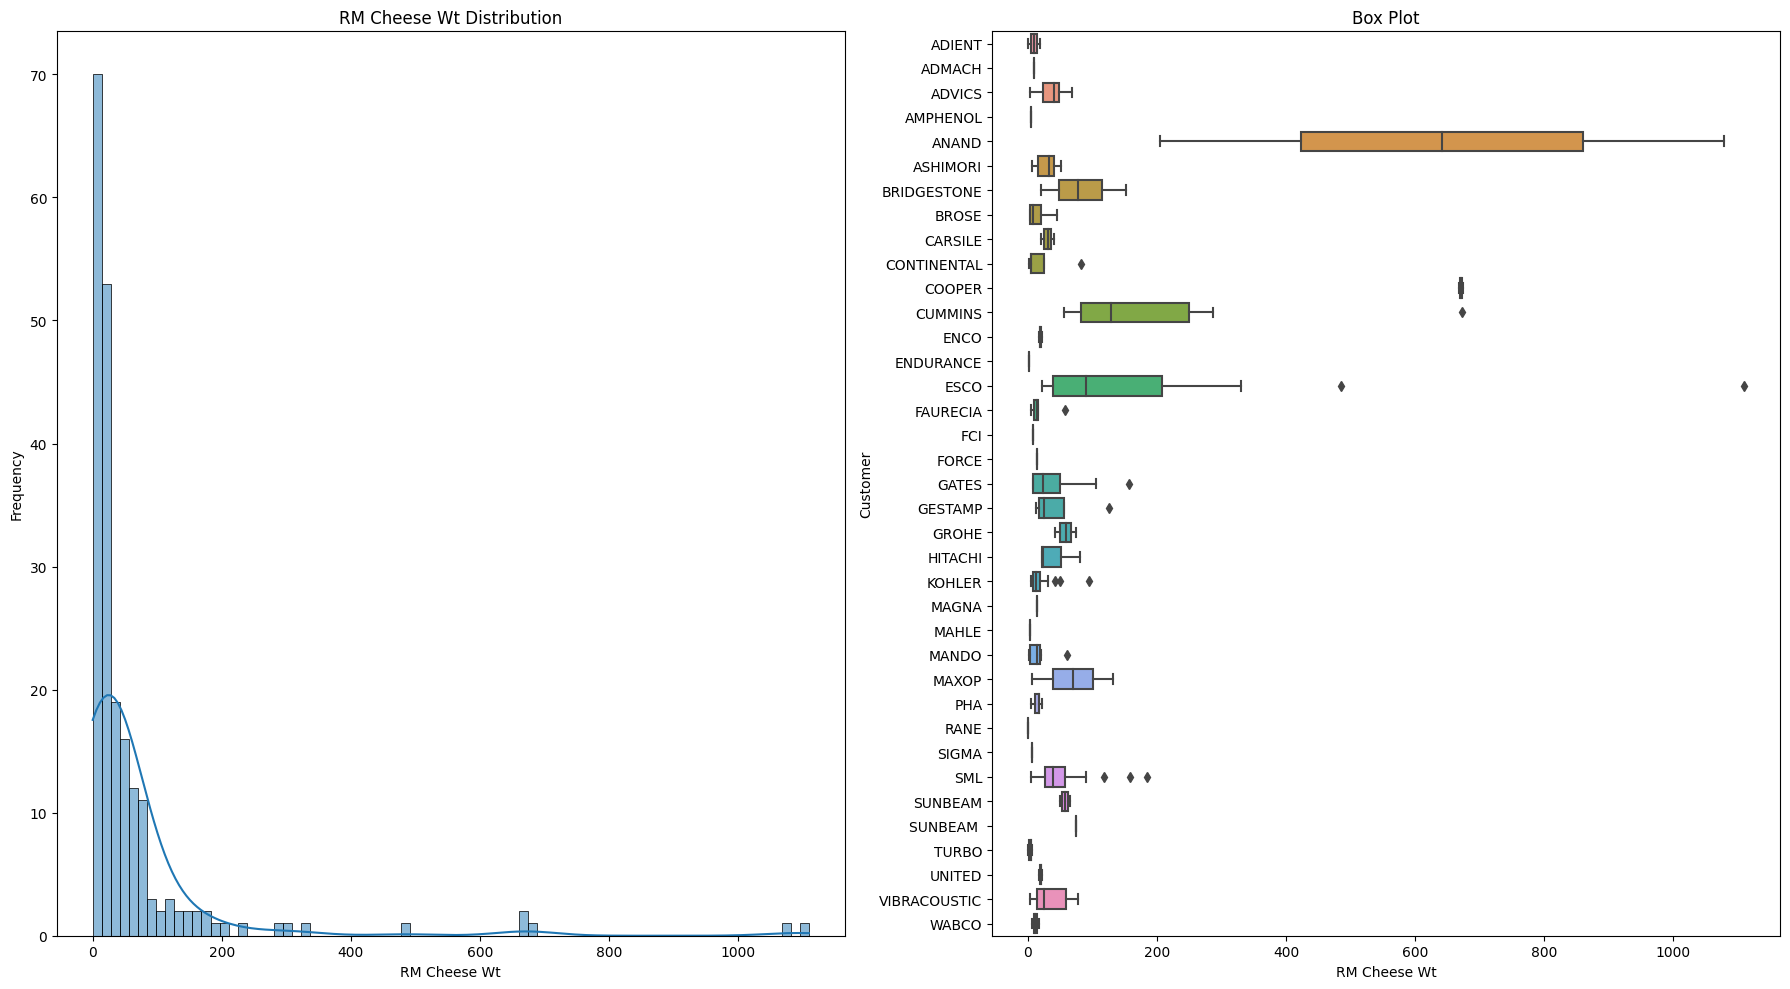

In [12]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the histogram on the first subplot
sns.histplot(data=df1, x='RM Cheese Wt', kde=True, ax=axes[0])
axes[0].set_xlabel('RM Cheese Wt')
axes[0].set_title('RM Cheese Wt Distribution')
axes[0].set_ylabel('Frequency')

# Create a boxplot with swapped x and y axes on the second subplot
sns.boxplot(x='RM Cheese Wt', y='Customer', data=df1, ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('RM Cheese Wt')
axes[1].set_ylabel('Customer')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Checking Noise

In [13]:
d1 = df1['Customer'] == 'CONTINENTAL'
d11 = df1[d1]

d22 = d11[d11['RM Cheese Wt'] > 40]


d22

# No Noise ,,,its reality

,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues
37,M8 x 147.15 TIE ROD GR8.8 Zn PLAT*,24,CONTINENTAL,4,20230,3260,1818,43.24,83.0,144,731


# Rej Outliers Detection

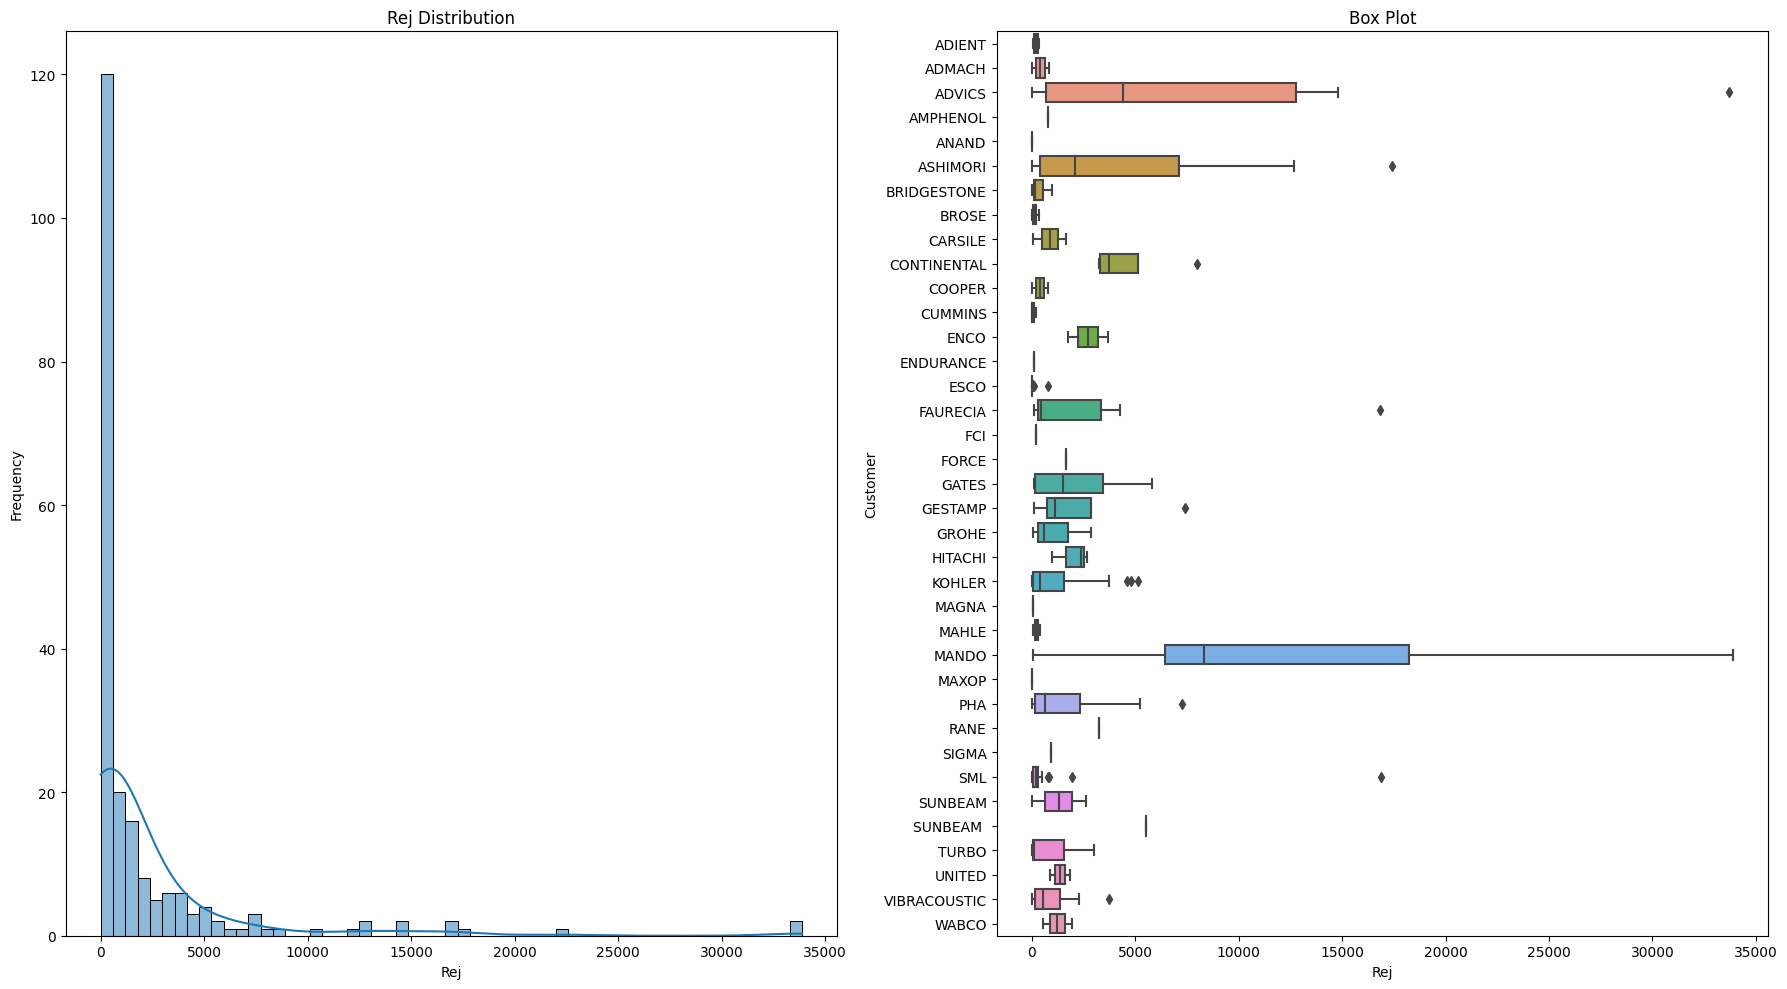

In [14]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the histogram on the first subplot
sns.histplot(data=df1, x='Rej', kde=True, ax=axes[0])
axes[0].set_xlabel('Rej')
axes[0].set_title('Rej Distribution')
axes[0].set_ylabel('Frequency')

# Create a boxplot with swapped x and y axes on the second subplot
sns.boxplot(x='Rej', y='Customer', data=df1, ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('Rej')
axes[1].set_ylabel('Customer')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Rework Outliers Detection

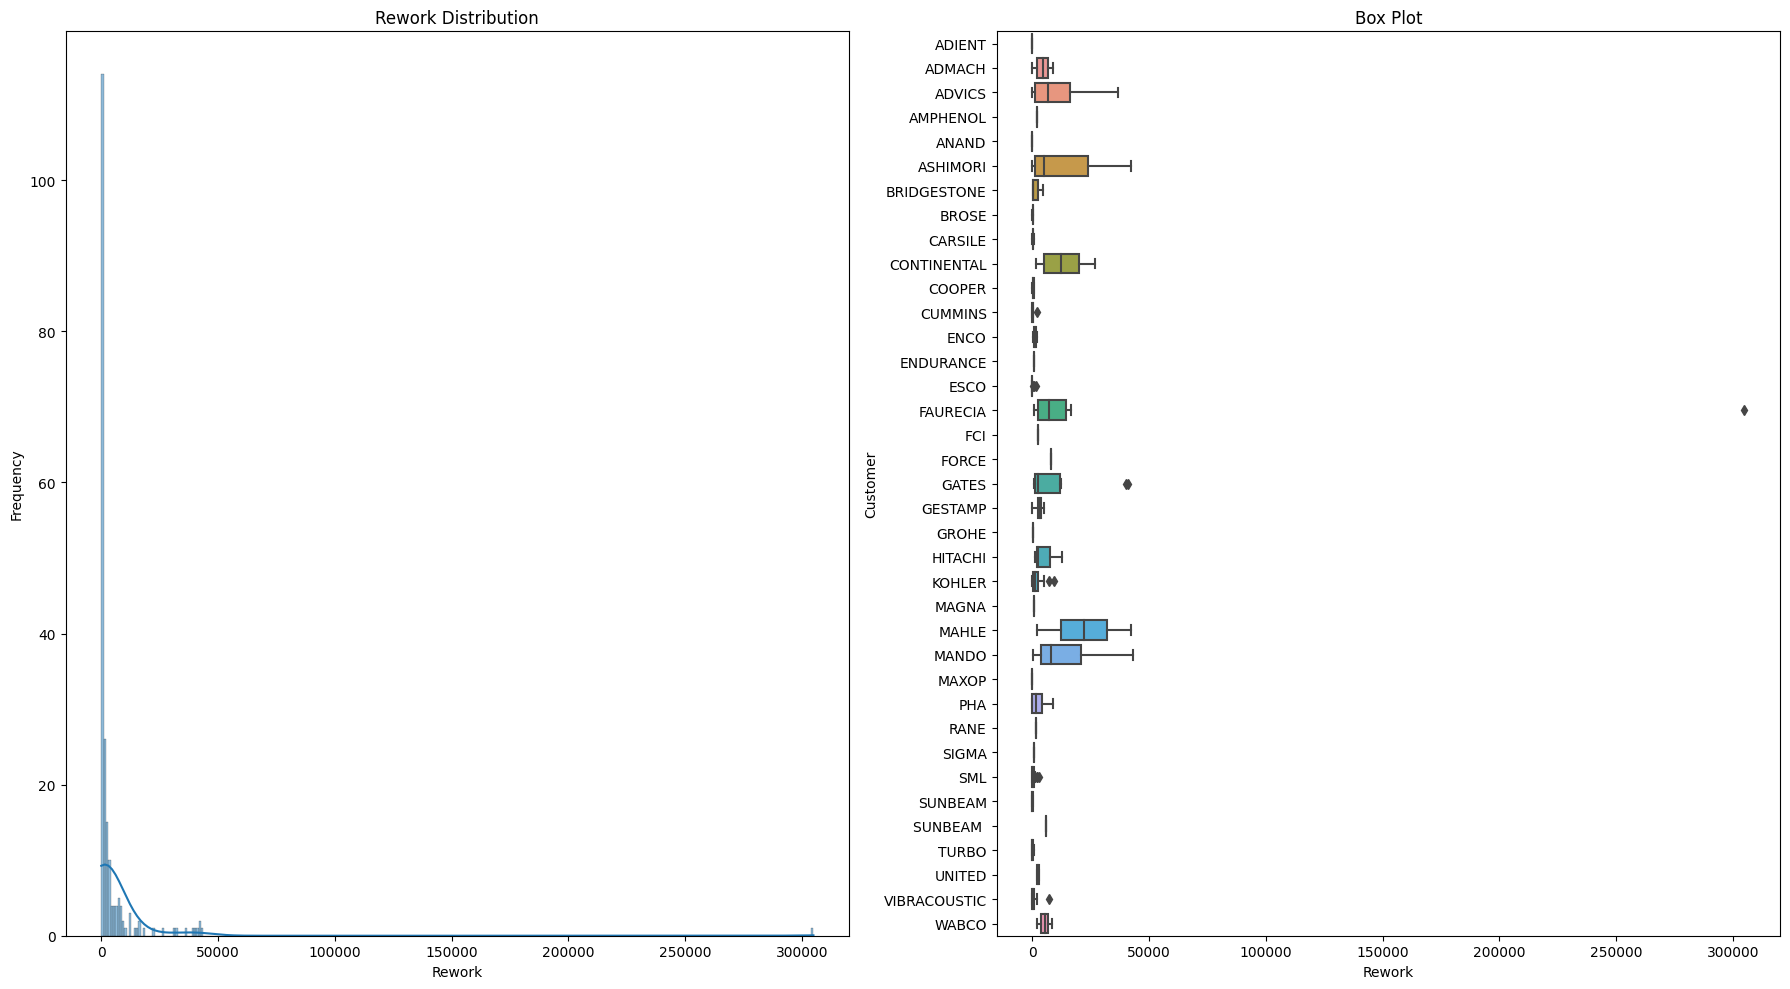

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the histogram on the first subplot
sns.histplot(data=df1, x='Rework', kde=True, ax=axes[0])
axes[0].set_xlabel('Rework')
axes[0].set_title('Rework Distribution')
axes[0].set_ylabel('Frequency')

# Create a boxplot with swapped x and y axes on the second subplot
sns.boxplot(x='Rework', y='Customer', data=df1, ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('Rework')
axes[1].set_ylabel('Customer')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Crack Outliers Detection

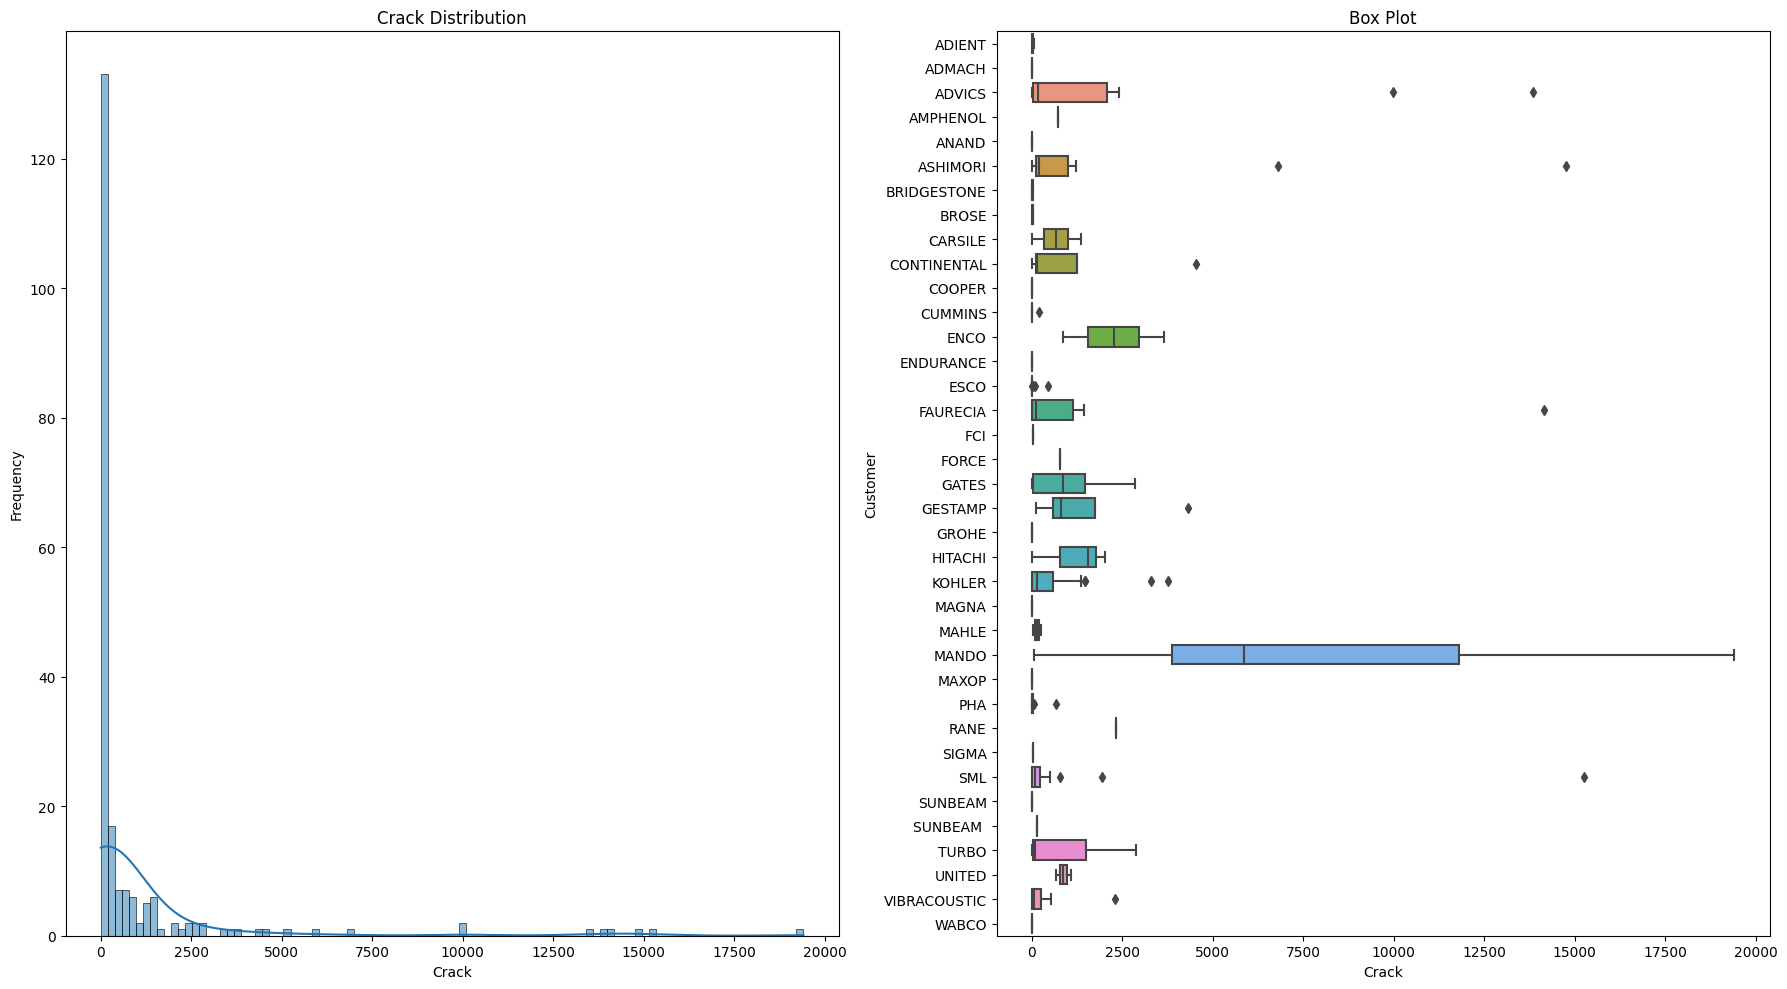

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the histogram on the first subplot
sns.histplot(data=df1, x='Crack', kde=True, ax=axes[0])
axes[0].set_xlabel('Crack')
axes[0].set_title('Crack Distribution')
axes[0].set_ylabel('Frequency')

# Create a boxplot with swapped x and y axes on the second subplot
sns.boxplot(x='Crack', y='Customer', data=df1, ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('Crack')
axes[1].set_ylabel('Customer')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Plating Issues Outliers Detection

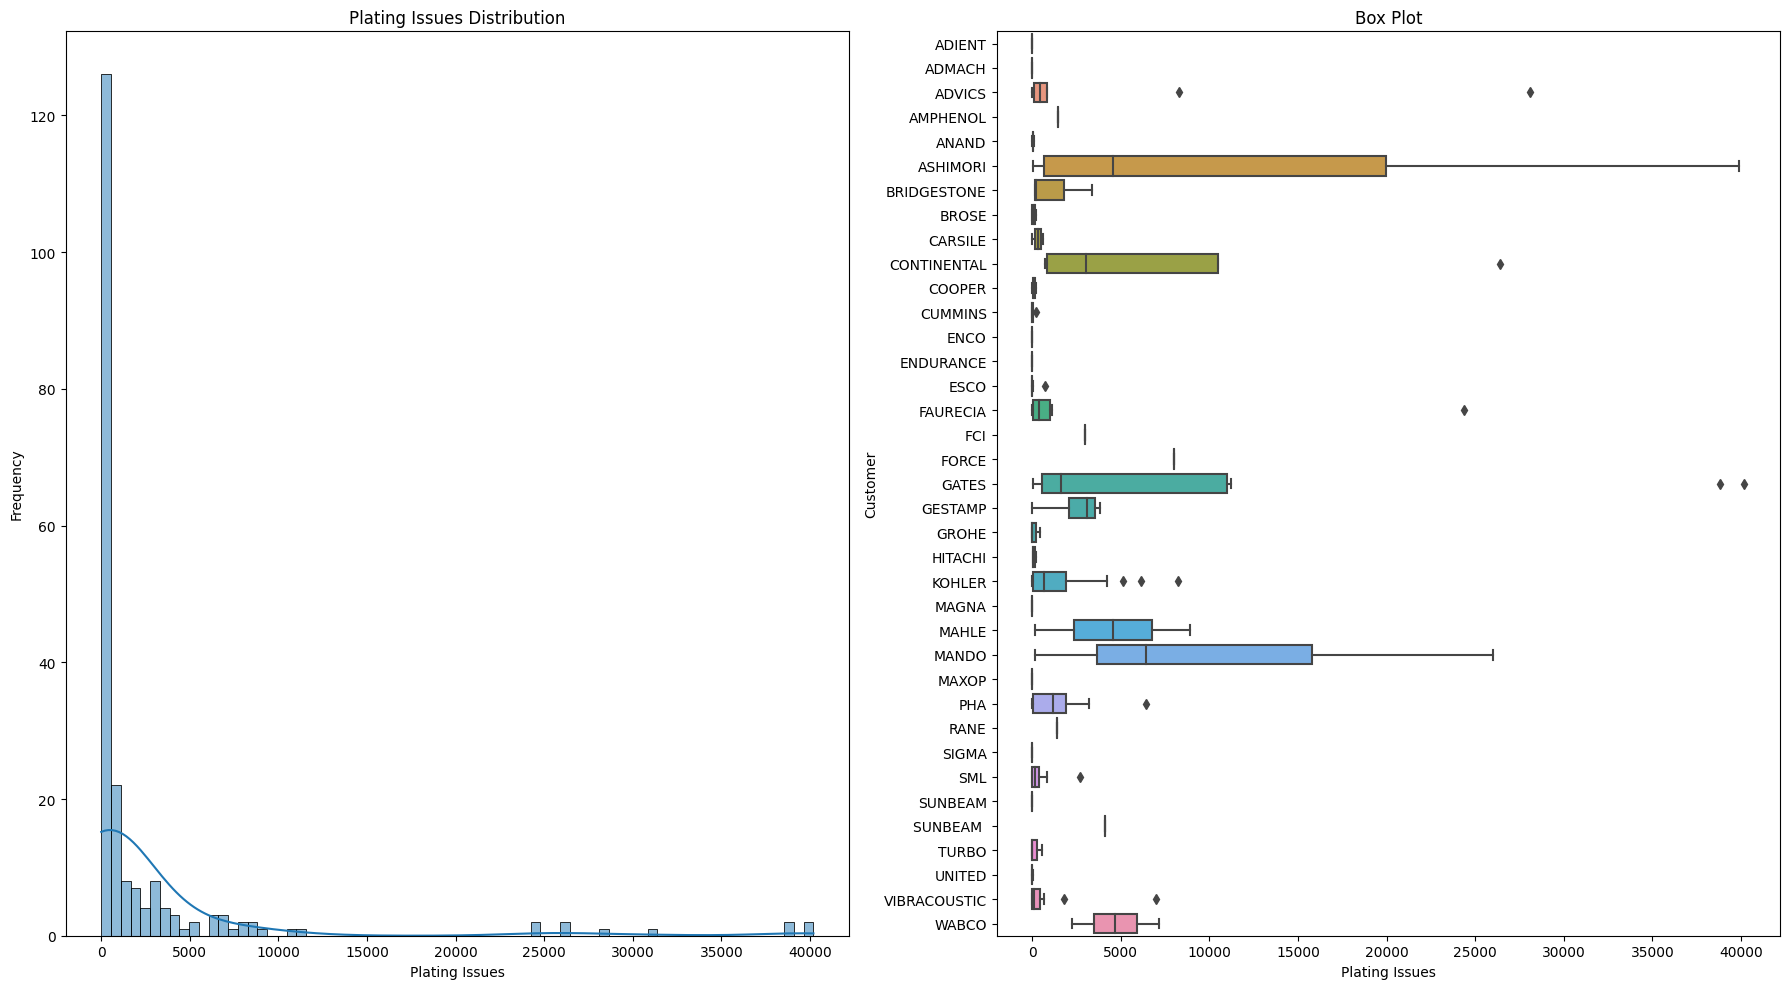

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the histogram on the first subplot
sns.histplot(data=df1, x='Plating Issues', kde=True, ax=axes[0])
axes[0].set_xlabel('Plating Issues')
axes[0].set_title('Plating Issues Distribution')
axes[0].set_ylabel('Frequency')

# Create a boxplot with swapped x and y axes on the second subplot
sns.boxplot(x='Plating Issues', y='Customer', data=df1, ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('Plating Issues')
axes[1].set_ylabel('Customer')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [18]:
df1.isnull().sum()[df1.isnull().sum()>0]

Series([], dtype: int64)

In [19]:
cust_df = df1.drop(['Part Desc','Customer'], axis=1)

In [20]:
df1.head()

,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues
0,"3/32""x 0.375"" ARMREST RIVET X104*",15,ADIENT,0,247849,375,0,1.84,0.310,54,0
1,BLIND RIVIT,3,ADIENT,0,18000,54,0,0.00,18.514,0,0
2,DIA 8 X 19.2 SPL RIVET PLAIN*,15,ADMACH,2,287426,839,8845,2.02,9.950,11,13
3,DIA 8 X 19.6 SPL RIVET PLAIN*,2,ADMACH,2,5330,0,0,2.02,9.950,0,0
4,CCBL CUP,152,ADVICS,13,189322,7396,14520,20.90,43.000,112,389


In [21]:
df1.columns

Index(['Part Desc', 'Monthly Part Freq Numeric', 'Customer',
       'Customer rank Numeric', 'OK', 'Rej', 'Rework', 'Sales Price/Pc',
       'RM Cheese Wt', 'Crack', 'Plating Issues'],
      dtype='object')

In [22]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Monthly Part Freq Numeric  209 non-null    int64  
 1   Customer rank Numeric      209 non-null    int64  
 2   OK                         209 non-null    int64  
 3   Rej                        209 non-null    int64  
 4   Rework                     209 non-null    int64  
 5   Sales Price/Pc             209 non-null    float64
 6   RM Cheese Wt               209 non-null    float64
 7   Crack                      209 non-null    int64  
 8   Plating Issues             209 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 14.8 KB


# Kmeans Assumptions
🌟 K-Means Assumptions

🌐 Cluster Shape: Assumes clusters are roughly spherical.

📊 Cluster Size: Expects clusters to have roughly equal sizes.

🤝 Cluster Separation: Assumes well-separated clusters.

📏 Linearity: Works best with linearly separable clusters.

📦 Homogeneity of Variance: Assumes similar variance within clusters.

🎯 Initial Centroid Guess: Sensitive to initial centroid positions.

📏 Euclidean Distance Metric: Uses Euclidean distance; continuous features are ideal.

🔢 Fixed Number of Clusters (K): Requires knowing or estimating the number of clusters.

📈 Outlier Sensitivity: Sensitive to outliers, which can impact cluster centroids.

⚖️ Scaling Recommendation: Scaling the data is often recommended to ensure equal feature influence and reduce outlier sensitivity.

Including the sensitivity to outliers highlights an important aspect of K-means clustering, where extreme values or outliers can affect the clustering results.

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
X = StandardScaler()

In [25]:
scaled_df = X.fit_transform(cust_df)

In [26]:
scaled_df.shape

(209, 9)

In [27]:
k_means = KMeans(n_clusters = 2)

In [28]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [29]:
k_means.labels_

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
k_means.inertia_

1261.8184700403267

In [31]:
wss =[]

In [32]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [33]:
wss

[1881.0000000000005,
 1261.8184700403267,
 953.3075893625098,
 754.4415603171446,
 632.5310935126537,
 510.6661323707031,
 437.2802694072973,
 373.8003217506671,
 342.51574816494525,
 318.37047075964927]

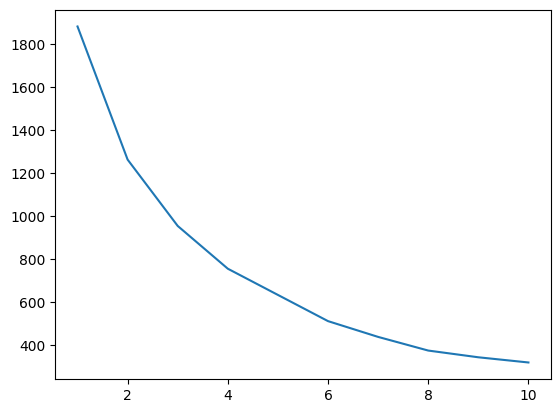

In [34]:
plt.plot(range(1,11), wss)

In [35]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [36]:
df1["Clus_kmeans"] = labels
df1.head(5)

,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues,Clus_kmeans
0,"3/32""x 0.375"" ARMREST RIVET X104*",15,ADIENT,0,247849,375,0,1.84,0.310,54,0,0
1,BLIND RIVIT,3,ADIENT,0,18000,54,0,0.00,18.514,0,0,0
2,DIA 8 X 19.2 SPL RIVET PLAIN*,15,ADMACH,2,287426,839,8845,2.02,9.950,11,13,0
3,DIA 8 X 19.6 SPL RIVET PLAIN*,2,ADMACH,2,5330,0,0,2.02,9.950,0,0,0
4,CCBL CUP,152,ADVICS,13,189322,7396,14520,20.90,43.000,112,389,1


In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
silhouette_score(scaled_df,labels)

0.7035191459956207

In [39]:
sil_width = silhouette_samples(scaled_df,labels)

In [40]:
df1["sil_width"] = sil_width
df1.head(5)

,Part Desc,Monthly Part Freq Numeric,Customer,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues,Clus_kmeans,sil_width
0,"3/32""x 0.375"" ARMREST RIVET X104*",15,ADIENT,0,247849,375,0,1.84,0.310,54,0,0,0.777271
1,BLIND RIVIT,3,ADIENT,0,18000,54,0,0.00,18.514,0,0,0,0.851333
2,DIA 8 X 19.2 SPL RIVET PLAIN*,15,ADMACH,2,287426,839,8845,2.02,9.950,11,13,0,0.756832
3,DIA 8 X 19.6 SPL RIVET PLAIN*,2,ADMACH,2,5330,0,0,2.02,9.950,0,0,0,0.849238
4,CCBL CUP,152,ADVICS,13,189322,7396,14520,20.90,43.000,112,389,1,-0.068400


In [41]:
silhouette_samples(scaled_df,labels).min()

-0.32151163224963253

In [42]:
df1.Clus_kmeans.value_counts().sort_index()

0    185
1     19
2      5
Name: Clus_kmeans, dtype: int64

In [43]:
final_df = df1.drop(['Part Desc','Customer'], axis=1)

In [44]:
final_df=final_df.groupby('Clus_kmeans').mean()

In [45]:
final_df['freq']=df1.Clus_kmeans.value_counts().sort_index()

In [46]:
final_df

,Monthly Part Freq Numeric,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues,sil_width,freq
Clus_kmeans,,,,,,,,,,,
0,7.508108,2.172973,63257.989189,972.243243,2043.767568,13.341119,45.144541,402.064865,1071.032432,0.777044,185
1,59.526316,7.947368,530910.052632,13815.105263,38886.947368,6.705305,22.898421,7184.210526,18812.736842,0.031979,19
2,4.600000,4.000000,4067.000000,159.200000,211.200000,331.304000,840.600000,0.600000,39.000000,0.534962,5


In [47]:
final_df.to_excel('KMeans summary.xlsx')

In [48]:
df1.to_excel('Kmeans.xlsx')

# 🌟 Advantages of DBSCAN over K-means

📊 Discover Arbitrary Shapes: DBSCAN can find clusters of various shapes, including non-convex ones.

📈 Automatic Cluster Number: DBSCAN dynamically determines the number of clusters, making it more flexible.

🚫 Robust to Outliers: DBSCAN is less sensitive to outliers, labeling them as noise.

📉 No Equal Cluster Size Assumption: DBSCAN doesn't assume clusters have equal sizes.

🧹 Handles Noisy Data: Designed to handle datasets with noise by identifying and labeling noisy data.

🔄 Less Sensitive to Initialization: Initialization doesn't strongly affect DBSCAN.

📏 Not Affected by Scaling: DBSCAN's distance metric is less sensitive to feature scaling.

These advantages make DBSCAN a strong choice for datasets with complex structures, varying cluster sizes, and noisy data, where K-means may have limitations.

In [49]:
array=cust_df.values
array

array([[1.50000e+01, 0.00000e+00, 2.47849e+05, ..., 3.10000e-01,
        5.40000e+01, 0.00000e+00],
       [3.00000e+00, 0.00000e+00, 1.80000e+04, ..., 1.85140e+01,
        0.00000e+00, 0.00000e+00],
       [1.50000e+01, 2.00000e+00, 2.87426e+05, ..., 9.95000e+00,
        1.10000e+01, 1.30000e+01],
       ...,
       [4.00000e+00, 2.00000e+00, 1.98760e+04, ..., 7.80000e+01,
        2.07000e+02, 0.00000e+00],
       [3.00000e+00, 0.00000e+00, 2.51740e+04, ..., 1.77700e+01,
        7.00000e+00, 2.24400e+03],
       [2.70000e+01, 0.00000e+00, 2.85121e+05, ..., 5.80000e+00,
        0.00000e+00, 7.14500e+03]])

In [50]:
#####normalize data############
from sklearn.preprocessing import StandardScaler
stsclr=StandardScaler().fit(array)
norm_data=stsclr.transform(array)

In [51]:
#############DBSCAN clustering#########
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.8,min_samples=6).fit(norm_data)
clusters=pd.DataFrame(model.labels_,columns=['clusters'])
clusters.value_counts()
#-1 cluster represents outliers which means we have 80 datapts as outliers
final_data=pd.concat([clusters,df1],axis=1)
final_data.groupby(final_data.clusters).sum()

,Monthly Part Freq Numeric,Customer rank Numeric,OK,Rej,Rework,Sales Price/Pc,RM Cheese Wt,Crack,Plating Issues,Clus_kmeans,sil_width
clusters,,,,,,,,,,,
-1,1865,292,16313583,352842,961063,2927.720626,7469.980,172266,466691,29,25.419666
0,615,129,5353682,87672,149060,1104.767400,4906.174,38101,87088,0,113.250663
1,63,152,143089,2634,7882,219.539700,613.656,518,1999,0,8.365173


In [52]:
final_data.to_excel('dbscan.xlsx')

# **K-means Clustering vs. DBSCAN**

In the field of unsupervised machine learning, there are various clustering algorithms available. Two popular methods are K-means clustering and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Let's compare and contrast these two clustering techniques.

## K-means Clustering

- **Type**: Distance-based clustering
- **Every observation**: Becomes a part of some cluster eventually
- **Cluster Shape**: Forms clusters that have a shape of a hypersphere (a circle in 2D, a sphere in 3D, etc.)
- **Sensitivity to Outliers**: Sensitive to outliers
- **Number of Clusters**: Requires the number of clusters as input

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- **Type**: Density-based clustering
- **Every observation**: Clearly separates outliers and clusters observations in high-density areas
- **Cluster Shape**: Forms clusters that have an arbitrary shape or clusters within clusters
- **Sensitivity to Outliers**: Robust to outliers
- **Number of Clusters**: Doesn’t require the number of clusters as input

In summary, K-means clustering is distance-based and requires specifying the number of clusters in advance. It forms clusters that are hyperspheres and is sensitive to outliers. On the other hand, DBSCAN is a density-based clustering method that doesn't require specifying the number of clusters, can identify clusters with arbitrary shapes, and is robust to outliers.
